In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
INCIDENTS = '../dataset/data-raw/incidents.csv'
POVERTYYEAY = '../dataset/data-raw/povertyByStateYear.csv'
STATEDISHOUSE = '../dataset/data-raw/year_state_district_house.csv'

incidents = pd.read_csv(INCIDENTS)
poverty = pd.read_csv(POVERTYYEAY)
state_district_house = pd.read_csv(STATEDISHOUSE)

incidents['state'] = incidents['state'].str.upper()
poverty['state'] = poverty['state'].str.upper()
state_district_house['state'] = state_district_house['state'].str.upper()

/tmp/ipykernel_2025/2836909318.py:10: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv(INCIDENTS)


In [105]:
incidents['date_year'] = pd.to_datetime(incidents['date']).dt.year
incidents['date_month'] = pd.to_datetime(incidents['date']).dt.month
incidents['date_day'] = pd.to_datetime(incidents['date']).dt.day
# incidents = incidents.drop(columns=['date'])

In [106]:
# np.sort(incidents['date_year'].unique())
wrong_years = incidents['date_year'] > 2018

In [108]:
incidents.columns

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2', 'date_year',
       'date_month', 'date_day'],
      dtype='object')

In [147]:
def age2int(age):
    try:
        if age == np.nan:
            return np.nan
        age = float(age)
        if age == None:
            return np.nan
        if age > 0 and age < 100:
            return age
        return np.nan
    except Exception:
        return np.nan
    
def n_parts2int(parts):
    try:
        if parts == np.nan:
            return np.nan
        parts = float(parts)
        if parts < 0:
            return np.nan
        return parts
    except:
        return np.nan

numeric_incidents = pd.DataFrame()
numeric_incidents['date_year'] = incidents['date_year']
numeric_incidents['date_month'] = incidents['date_month']
numeric_incidents['date_day'] = incidents['date_day']
numeric_incidents['latitude'] = incidents['latitude']
numeric_incidents['longitude'] = incidents['longitude']
numeric_incidents['participant_age1'] = incidents['participant_age1']
numeric_incidents['participant_gender_1'] = incidents['participant_gender1'].map(lambda x: 0 if x == 'Male' else 1 if x == 'Female' else np.nan)
numeric_incidents['min_age_participants'] = incidents['min_age_participants'].map(age2int)
numeric_incidents['avg_age_participants'] = incidents['avg_age_participants'].map(age2int)
numeric_incidents['max_age_participants'] = incidents['max_age_participants'].map(age2int)
numeric_incidents['n_participants_child'] = incidents['n_participants_child'].map(n_parts2int)
numeric_incidents['n_participants_teen'] = incidents['n_participants_teen'].map(n_parts2int)
numeric_incidents['n_participants_adult'] = incidents['n_participants_adult'].map(n_parts2int)
numeric_incidents['n_males'] = incidents['n_males']
numeric_incidents['n_females'] = incidents['n_females']
numeric_incidents['n_killed'] = incidents['n_killed']
numeric_incidents['n_injured'] = incidents['n_injured']
numeric_incidents['n_arrested'] = incidents['n_arrested']
numeric_incidents['n_unharmed'] = incidents['n_unharmed']
numeric_incidents['n_participants'] = incidents['n_participants']
state_district_house['congressional_district'] = state_district_house['congressional_district'].astype('float64')
numeric_incidents = incidents.merge(poverty, how='left', left_on=['state', 'date_year'], right_on=['state', 'year'])
incidents = incidents[incidents['date_year'] < 2018]
incidents['date_year_district'] = incidents['date_year'].map(lambda x: x // 2 * 2)
incidents = incidents.merge(state_district_house, how='left', left_on=['state', 'congressional_district', 'date_year_district'], right_on=['state', 'congressional_district', 'year'])

# change dtype of state_district_house['congressional_district'] to float64

# incidents[(incidents['party'].isna()) * incidents['state'] == "UTAH"]
# incidents[incidents['congressional_district'] == 0]['state'].unique()

# max_col = numeric_incidents.mean(axis=0)
# numeric_incidents = numeric_incidents.fillna(max_col)
# max_col
# numeric_incidents = numeric_incidents.multiply(1/max_col, axis=1)


# corr = numeric_incidents.corr()
# corr = corr.abs()
# # set to 0 all the values under 0.7
# # corr[corr < 0.6] = 0

# plt.matshow(corr)
# # add labels
# plt.xticks(range(len(numeric_incidents.columns)), numeric_incidents.columns)
# plt.yticks(range(len(numeric_incidents.columns)), numeric_incidents.columns)
# # set x ticks to vertical
# plt.xticks(rotation=90)
# plt.colorbar()
# # set value limits to [-1,1]
# plt.clim(-1,1)

MergeError: Passing 'suffixes' which cause duplicate columns {'year_x'} is not allowed.

In [144]:
incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,candidatevotes_x,totalvotes_x,year_y,party_y,candidatevotes_y,totalvotes_y,year,party,candidatevotes,totalvotes
0,2015-05-02,INDIANA,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,61443.0,112261.0,2014.0,DEMOCRAT,61443.0,112261.0,2014.0,DEMOCRAT,61443.0,112261.0
1,2017-04-03,PENNSYLVANIA,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,206761.0,307843.0,2016.0,REPUBLICAN,206761.0,307843.0,2016.0,REPUBLICAN,206761.0,307843.0
2,2016-11-05,MICHIGAN,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,244135.0,310974.0,2016.0,DEMOCRAT,244135.0,310974.0,2016.0,DEMOCRAT,244135.0,310974.0
3,2016-10-15,DISTRICT OF COLUMBIA,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-18,NORTH CAROLINA,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,4.0,7.0,65.0,...,153991.0,268709.0,2014.0,REPUBLICAN,153991.0,268709.0,2014.0,REPUBLICAN,153991.0,268709.0


array([[<Axes: xlabel='date_year', ylabel='date_year'>,
        <Axes: xlabel='date_month', ylabel='date_year'>,
        <Axes: xlabel='date_day', ylabel='date_year'>,
        <Axes: xlabel='latitude', ylabel='date_year'>,
        <Axes: xlabel='longitude', ylabel='date_year'>,
        <Axes: xlabel='participant_age1', ylabel='date_year'>,
        <Axes: xlabel='participant_gender_1', ylabel='date_year'>,
        <Axes: xlabel='min_age_participants', ylabel='date_year'>,
        <Axes: xlabel='avg_age_participants', ylabel='date_year'>,
        <Axes: xlabel='max_age_participants', ylabel='date_year'>,
        <Axes: xlabel='n_participants_child', ylabel='date_year'>,
        <Axes: xlabel='n_participants_teen', ylabel='date_year'>,
        <Axes: xlabel='n_participants_adult', ylabel='date_year'>,
        <Axes: xlabel='n_males', ylabel='date_year'>,
        <Axes: xlabel='n_females', ylabel='date_year'>,
        <Axes: xlabel='n_killed', ylabel='date_year'>,
        <Axes: xlabel='n_

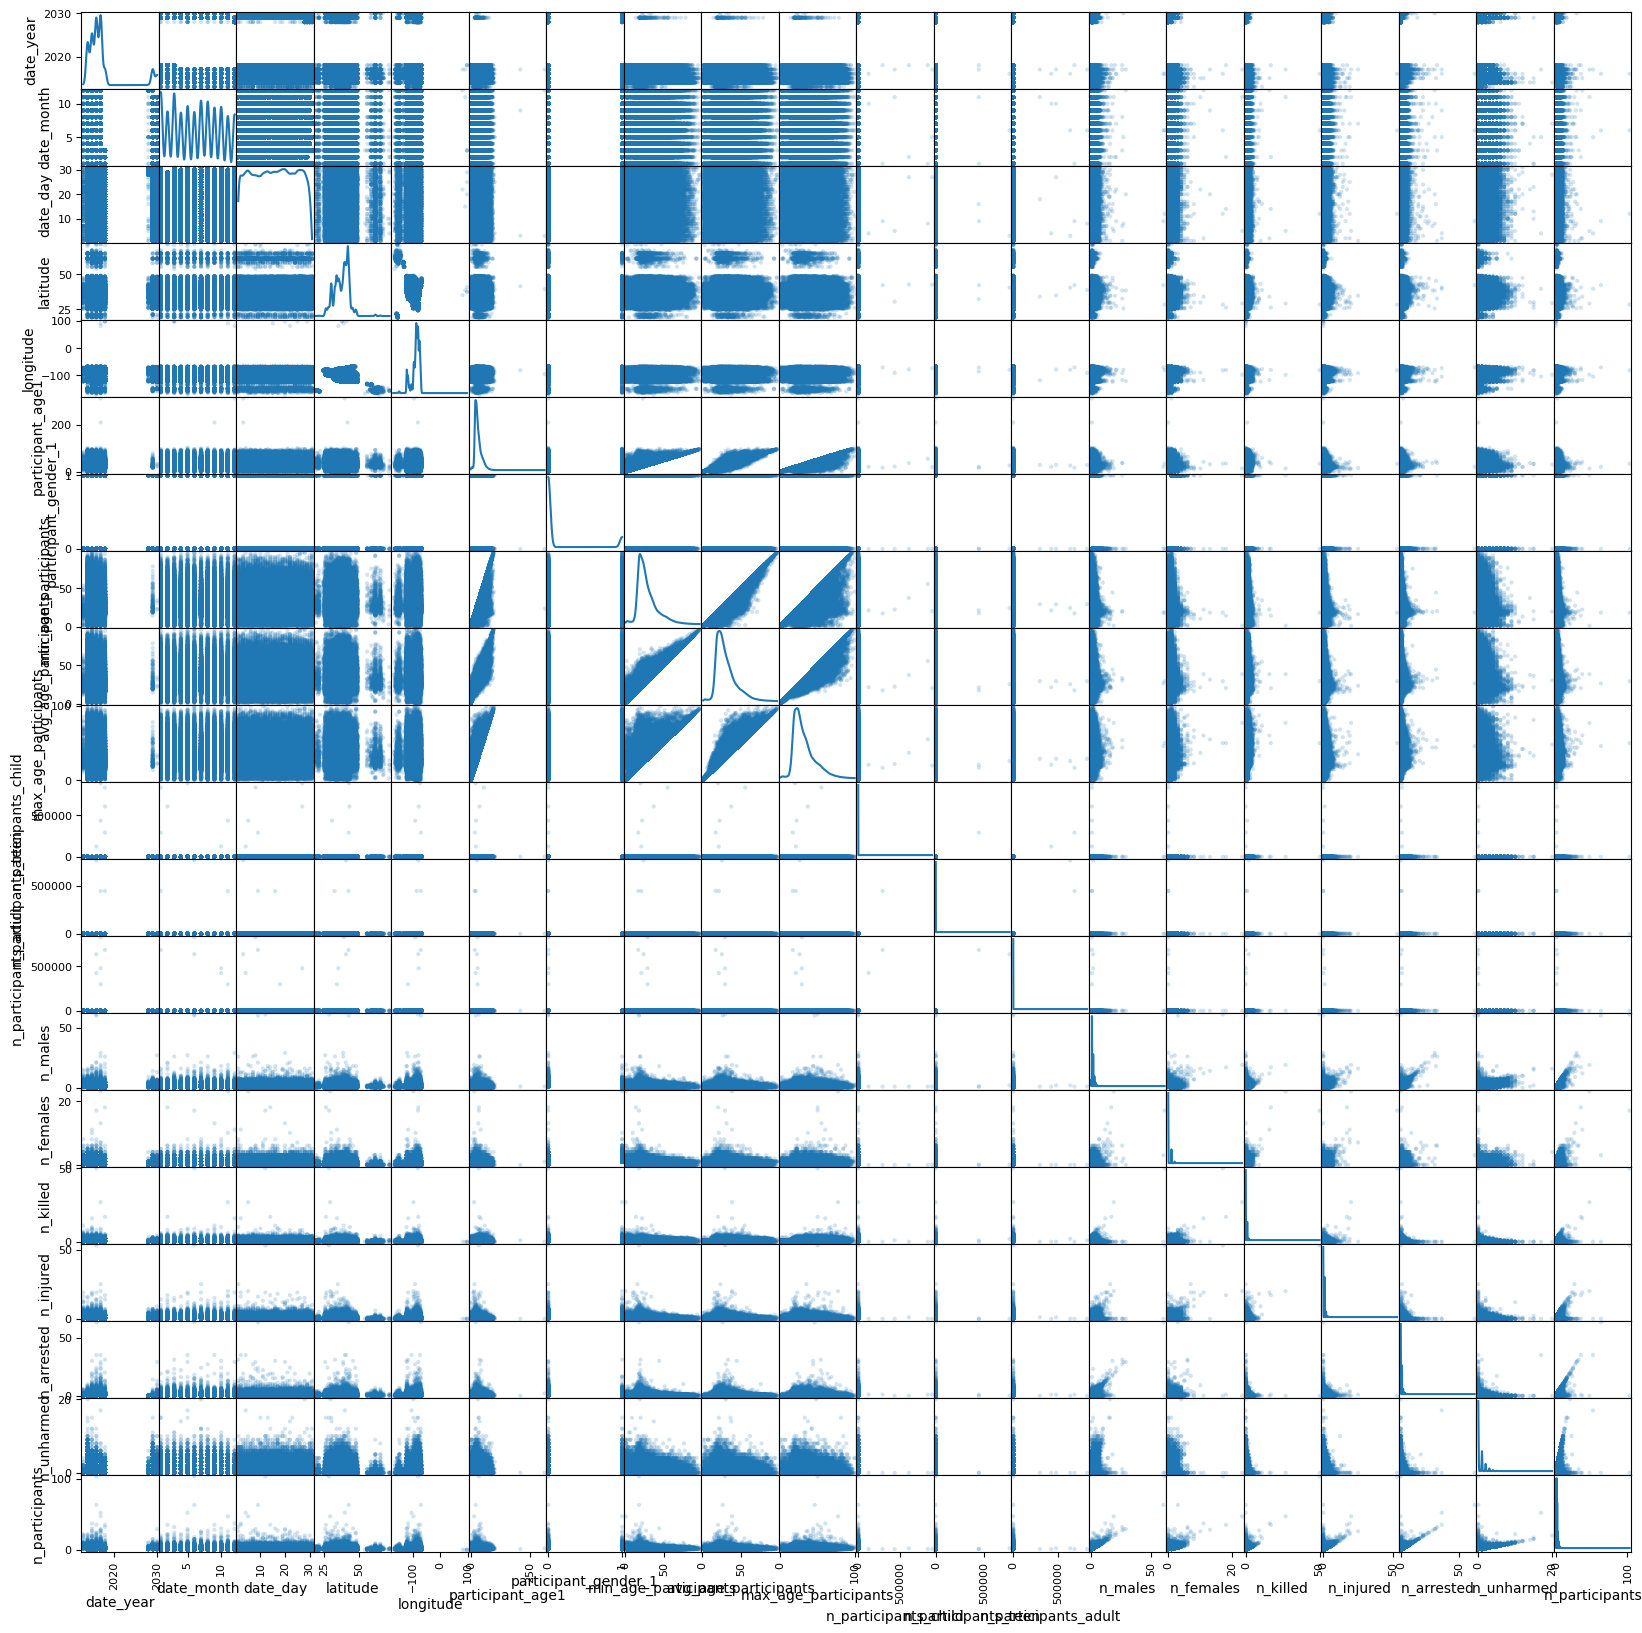

In [79]:
pd.plotting.scatter_matrix(numeric_incidents, alpha=0.2, figsize=(20, 20), diagonal='kde')

/tmp/ipykernel_2025/636303592.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca[:, 0], pca[:, 1], cmap=plt.cm.Set1, edgecolor='k', s=40)


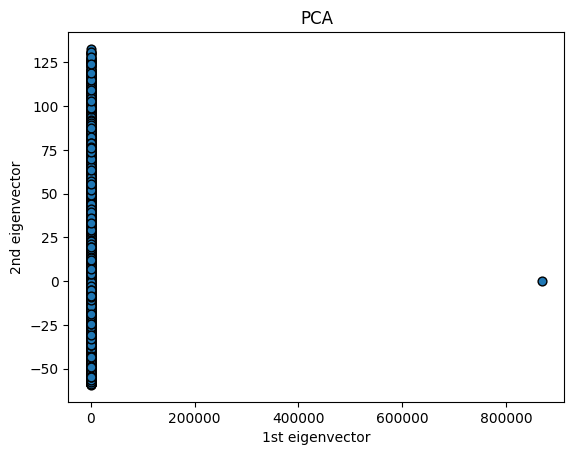

In [81]:
from sklearn.decomposition import PCA

numeric_incidents.dropna(inplace=True)

pca = PCA(n_components=2).fit_transform(numeric_incidents)
plt.scatter(pca[:, 0], pca[:, 1], cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

In [31]:
out_date = (incidents[(incidents['date'] > "2023-10-05")])
# apply a function to every row in the dataframe
def dec_year(year):
    dec = int(year[2]) - 1
    year = year[:2] + str(dec) + year[3:]
    return year

out_date['date'] = out_date.apply(lambda row: dec_year(row['date']), axis=1)

(out_date['date'] > '2023-10-05').sum()
# out_date
# order out_date by date
# out_date = out_date.sort_values(by=['date'])

/tmp/ipykernel_10928/3507822023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_date['date'] = out_date.apply(lambda row: dec_year(row['date']), axis=1)


0

In [50]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [52]:
incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [38]:
# Check if date is valid (no 2023-13-41 for example)
from datetime import datetime

def is_valid_date(date_str):
    try:
        datetime.strptime(date_str, '%Y-%m-%d')
        return True
    except ValueError:
        print(date_str)
        return False
    
(incidents['date'].apply(is_valid_date) - 1).sum()
# no errors

2023-11-31


0

# Date tests

Roughly 10% of dates were `in the future`
- fixed by subtracting 10 years from the date
- no erroneous dates remain after fix

check to see if any dates strings do not follow date rules (2023-13-41) 
- no erroneous dates found

Alabama, 5471
Alaska, 1349
Arizona, 2328
Arkansas, 2842
California, 16306
Colorado, 3201
Connecticut, 3067
Delaware, 1685
District of Columbia, 3195
Florida, 15029
Georgia, 8925
Hawaii, 289
Idaho, 661
Illinois, 17556
Indiana, 5852
Iowa, 2517
Kansas, 2145
Kentucky, 4157
Louisiana, 8103
Maine, 907
Maryland, 5798
Massachusetts, 5981
Michigan, 6136
Minnesota, 2408
Mississippi, 3599
Missouri, 6631
Montana, 638
Nebraska, 1651
Nevada, 1952
New Hampshire, 964
New Jersey, 5387
New Mexico, 1645
New York, 9712
North Carolina, 8739
North Dakota, 573
Ohio, 10244
Oklahoma, 3455
Oregon, 2286
Pennsylvania, 8929
Rhode Island, 895
South Carolina, 6939
South Dakota, 544
Tennessee, 7626
Texas, 13577
Utah, 1072
Vermont, 472
Virginia, 5949
Washington, 3434
West Virginia, 1575
Wisconsin, 4787
Wyoming, 494


<Axes: >

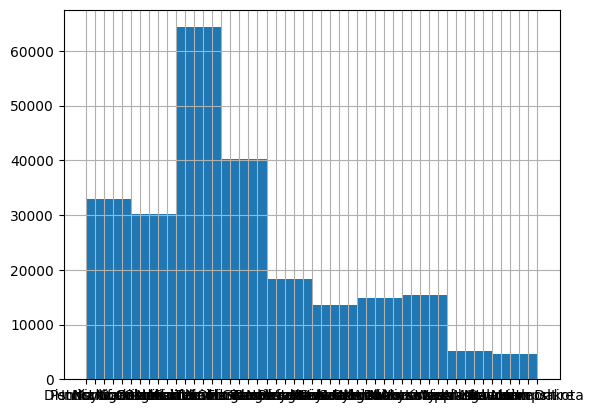

In [49]:
for a in sorted(incidents['state'].unique()):
    print(a + ', ' + (incidents['state'] == a).sum().astype(str))


# States check

No errors found in state names
- Washington DC is not a state, but is included in the data
    - We keep it in the data

In [51]:
incidents[((incidents['latitude'] < -90) + (incidents['latitude'] > 90) + (incidents['longitude'] < -180) + (incidents['longitude'] > 180))]

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2


# Latitudes and Longitudes

All values are in range
- latitudes are between -90 and 90
- longitudes are between -180 and 180

211674    311.0
170777    209.0
Name: participant_age1, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d3ce15010>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d3ce259d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d3ce16710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d3ce27250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d3ce2cf50>],
 'means': []}

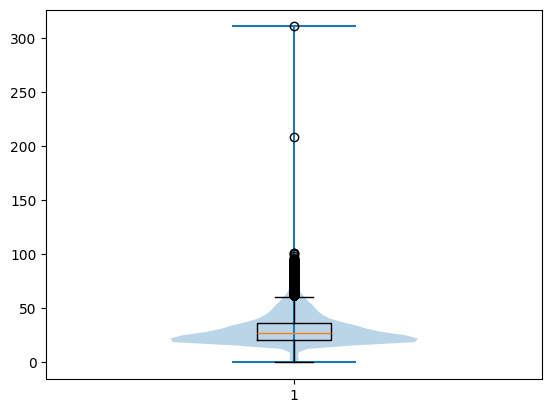

In [72]:
a = incidents['participant_age1'].sort_values(ascending=False)
print(a[:2])
plt.violinplot(a.dropna())
plt.boxplot(a.dropna())

# Participant age

a couple of erroneous values found [311, 209]

In [91]:
incidents['min_age_participants']

def isFloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def inRange(value):
    if value < 0 or value > 110:
        return False
    return True

def isAgeValid(value):
    if isFloat(value):
        if inRange(float(value)):
            return True
    return False

incidents[(incidents['min_age_participants'].apply(isAgeValid) == False) + (incidents['avg_age_participants'].apply(isAgeValid) == False) + (incidents['max_age_participants'].apply(isAgeValid) == False)].shape

(23139, 28)

# Min max avg errors

~ 10% of the data has errors in the min, max, and avg values
- most of the erroneous values are in all 3 columns altogether

In [106]:
a = incidents[(incidents['n_injured'] == 1) * (incidents['n_participants'] == 1) * (incidents['n_unharmed'] == 1)]

# some incidents have 1 participant, injured and unharmed at the same time

In [111]:
a = incidents[(incidents['n_participants_child'] + incidents['n_participants_teen'] + incidents['n_participants_adult']) != incidents['n_participants']].dropna(subset=['n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_participants'])

TypeError: can only concatenate str (not "float") to str